# Linear Shell 2 order solution

## Init symbols for *sympy*

In [2]:
from sympy import *
from geom_util import *
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

%matplotlib inline

%reload_ext autoreload
%autoreload 2
%aimport geom_util

In [3]:
# Any tweaks that normally go in .matplotlibrc, etc., should explicitly go here
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (12, 12)

plt.rc('text', usetex=True)
    
plt.rc('font', family='serif')

init_printing()

In [4]:
N = CoordSys3D('N')
alpha1, alpha2, alpha3 = symbols("alpha_1 alpha_2 alpha_3", real = True, positive=True)
A,K,rho, h = symbols("A K rho h")

### Square theory

$u^1 \left( \alpha_1, \alpha_2, \alpha_3 \right)=u_{10}\left( \alpha_1 \right)p_0\left( \alpha_3 \right)+u_{11}\left( \alpha_1 \right)p_1\left( \alpha_3 \right)+u_{12}\left( \alpha_1 \right)p_2\left( \alpha_3 \right) $

$u^2 \left( \alpha_1, \alpha_2, \alpha_3 \right)=0 $

$u^3 \left( \alpha_1, \alpha_2, \alpha_3 \right)=u_{30}\left( \alpha_1 \right)p_0\left( \alpha_3 \right)+u_{31}\left( \alpha_1 \right)p_1\left( \alpha_3 \right)+u_{32}\left( \alpha_1 \right)p_2\left( \alpha_3 \right) $

$ \left( 
\begin{array}{c} 
u^1 \\
\frac { \partial u^1 } { \partial \alpha_1} \\
\frac { \partial u^1 } { \partial \alpha_2} \\
\frac { \partial u^1 } { \partial \alpha_3} \\
u^2 \\
\frac { \partial u^2 } { \partial \alpha_1} \\
\frac { \partial u^2 } { \partial \alpha_2} \\
\frac { \partial u^2 } { \partial \alpha_3} \\
u^3 \\
\frac { \partial u^3 } { \partial \alpha_1} \\
\frac { \partial u^3 } { \partial \alpha_2} \\
\frac { \partial u^3 } { \partial \alpha_3} \\
\end{array} 
\right) = L \cdot 
\left( 
\begin{array}{c} 
u_{10} \\
\frac { \partial u_{10} } { \partial \alpha_1} \\
u_{11} \\
\frac { \partial u_{11} } { \partial \alpha_1} \\
u_{12} \\
\frac { \partial u_{12} } { \partial \alpha_1} \\
u_{30} \\
\frac { \partial u_{30} } { \partial \alpha_1} \\
u_{31} \\
\frac { \partial u_{31} } { \partial \alpha_1} \\
u_{32} \\
\frac { \partial u_{32} } { \partial \alpha_1} \\
\end{array} 
\right) $

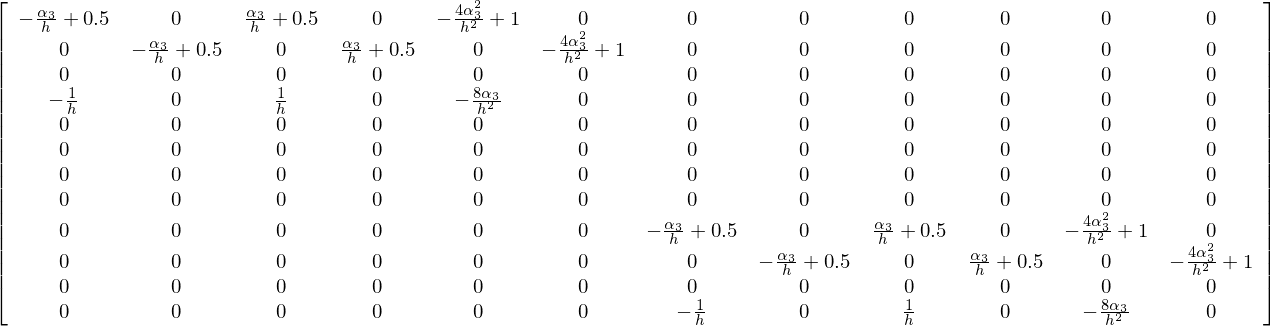

In [5]:
L=zeros(12,12)
p0=1/2-alpha3/h
p1=1/2+alpha3/h
p2=1-(2*alpha3/h)**2

L[0,0]=p0
L[0,2]=p1
L[0,4]=p2

L[1,1]=p0
L[1,3]=p1
L[1,5]=p2

L[3,0]=p0.diff(alpha3)
L[3,2]=p1.diff(alpha3)
L[3,4]=p2.diff(alpha3)

L[8,6]=p0
L[8,8]=p1
L[8,10]=p2

L[9,7]=p0
L[9,9]=p1
L[9,11]=p2

L[11,6]=p0.diff(alpha3)
L[11,8]=p1.diff(alpha3)
L[11,10]=p2.diff(alpha3)

L

In [6]:
integrate(p0*p0, (alpha3, -h/2, h/2))

In [7]:
integrate(p2*p2, (alpha3, -h/2, h/2))

In [8]:
integrate(p1*p1, (alpha3, -h/2, h/2))

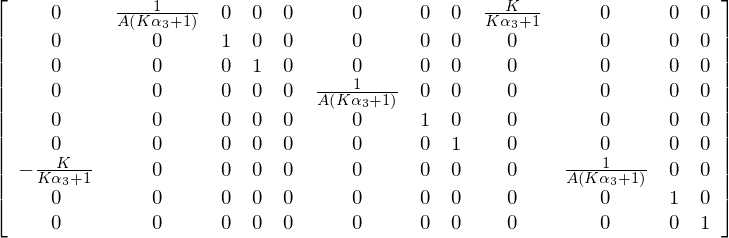

In [9]:
B=Matrix([[0, 1/(A*(K*alpha3 + 1)), 0, 0, 0, 0, 0, 0, K/(K*alpha3 + 1), 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1/(A*(K*alpha3 + 1)), 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [-K/(K*alpha3 + 1), 0, 0, 0, 0, 0, 0, 0, 0, 1/(A*(K*alpha3 + 1)), 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
B

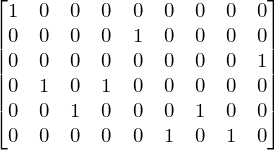

In [10]:
E=zeros(6,9)
E[0,0]=1
E[1,4]=1
E[2,8]=1
E[3,1]=1
E[3,3]=1
E[4,2]=1
E[4,6]=1
E[5,5]=1
E[5,7]=1
E

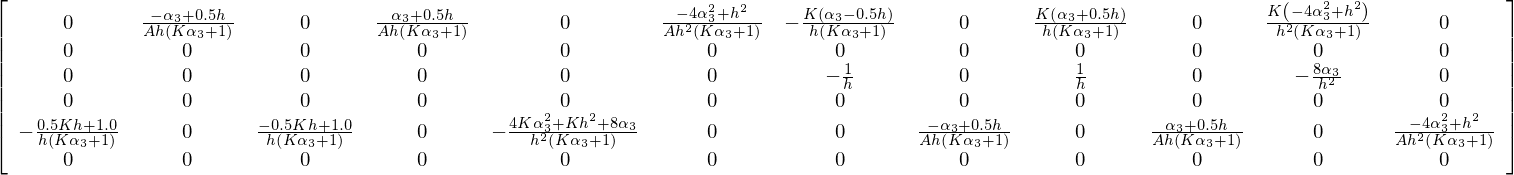

In [11]:
simplify(E*B*L)

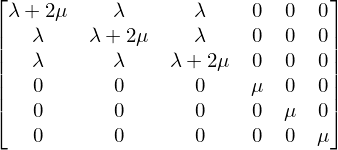

In [12]:
mu = Symbol('mu')
la = Symbol('lambda')
C_tensor = getIsotropicStiffnessTensor(mu, la)
C = convertStiffnessTensorToMatrix(C_tensor)
C

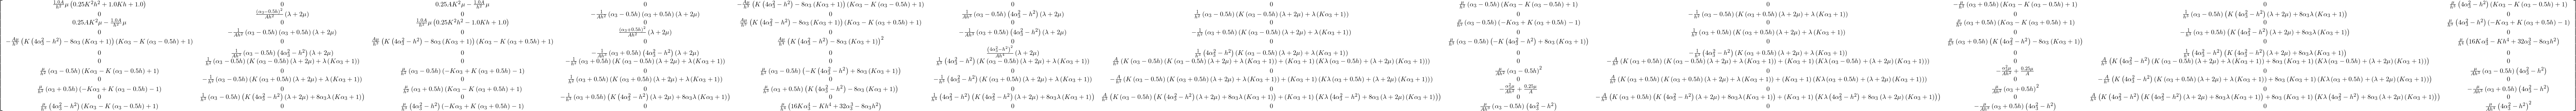

In [13]:
S=L.T*B.T*E.T*C*E*B*L*A*(1+alpha3*K)**2
S=simplify(S)
S

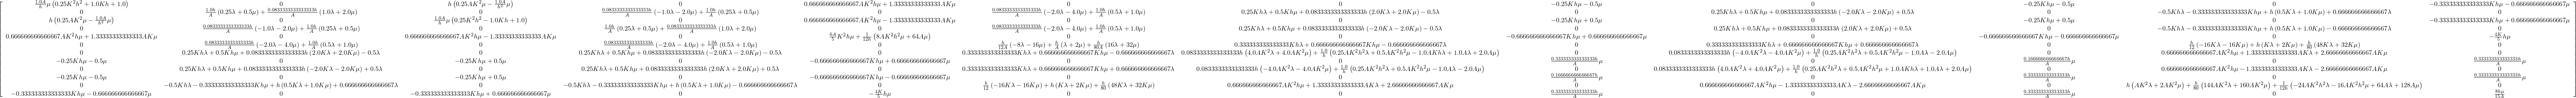

In [14]:
S_in = integrate(S,(alpha3, -h/2, h/2))
S_in

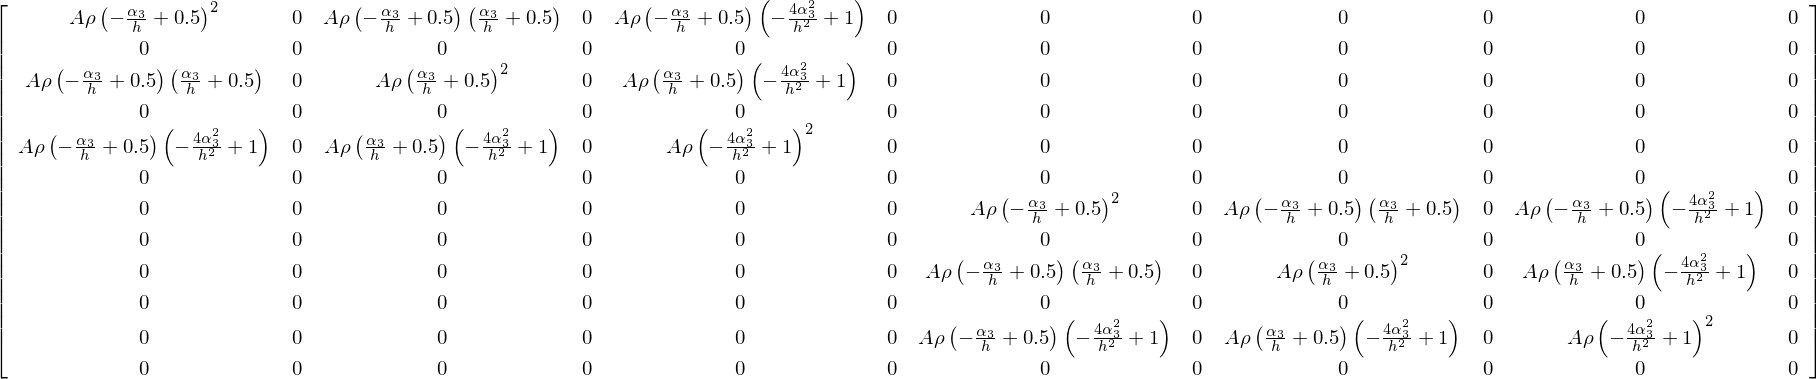

In [15]:
M=Matrix([[rho, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, rho, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, rho, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
M=L.T*M*L*A
M

In [16]:
M_in = integrate(M,(alpha3, -h/2, h/2))


r,c = M_in.shape
for i in range(r):
    for j in range(c):
        print("M[{},{}] = {}".format(i,j,M_in[i,j]))

M[0,0] = 0.333333333333333*A*h*rho
M[0,1] = 0
M[0,2] = 0.166666666666667*A*h*rho
M[0,3] = 0
M[0,4] = 0.333333333333333*A*h*rho
M[0,5] = 0
M[0,6] = 0
M[0,7] = 0
M[0,8] = 0
M[0,9] = 0
M[0,10] = 0
M[0,11] = 0
M[1,0] = 0
M[1,1] = 0
M[1,2] = 0
M[1,3] = 0
M[1,4] = 0
M[1,5] = 0
M[1,6] = 0
M[1,7] = 0
M[1,8] = 0
M[1,9] = 0
M[1,10] = 0
M[1,11] = 0
M[2,0] = 0.166666666666667*A*h*rho
M[2,1] = 0
M[2,2] = 0.333333333333333*A*h*rho
M[2,3] = 0
M[2,4] = 0.333333333333333*A*h*rho
M[2,5] = 0
M[2,6] = 0
M[2,7] = 0
M[2,8] = 0
M[2,9] = 0
M[2,10] = 0
M[2,11] = 0
M[3,0] = 0
M[3,1] = 0
M[3,2] = 0
M[3,3] = 0
M[3,4] = 0
M[3,5] = 0
M[3,6] = 0
M[3,7] = 0
M[3,8] = 0
M[3,9] = 0
M[3,10] = 0
M[3,11] = 0
M[4,0] = 0.333333333333333*A*h*rho
M[4,1] = 0
M[4,2] = 0.333333333333333*A*h*rho
M[4,3] = 0
M[4,4] = 8*A*h*rho/15
M[4,5] = 0
M[4,6] = 0
M[4,7] = 0
M[4,8] = 0
M[4,9] = 0
M[4,10] = 0
M[4,11] = 0
M[5,0] = 0
M[5,1] = 0
M[5,2] = 0
M[5,3] = 0
M[5,4] = 0
M[5,5] = 0
M[5,6] = 0
M[5,7] = 0
M[5,8] = 0
M[5,9] = 0
M[5,10] = 0
M[5,1

## Cartesian coordinates

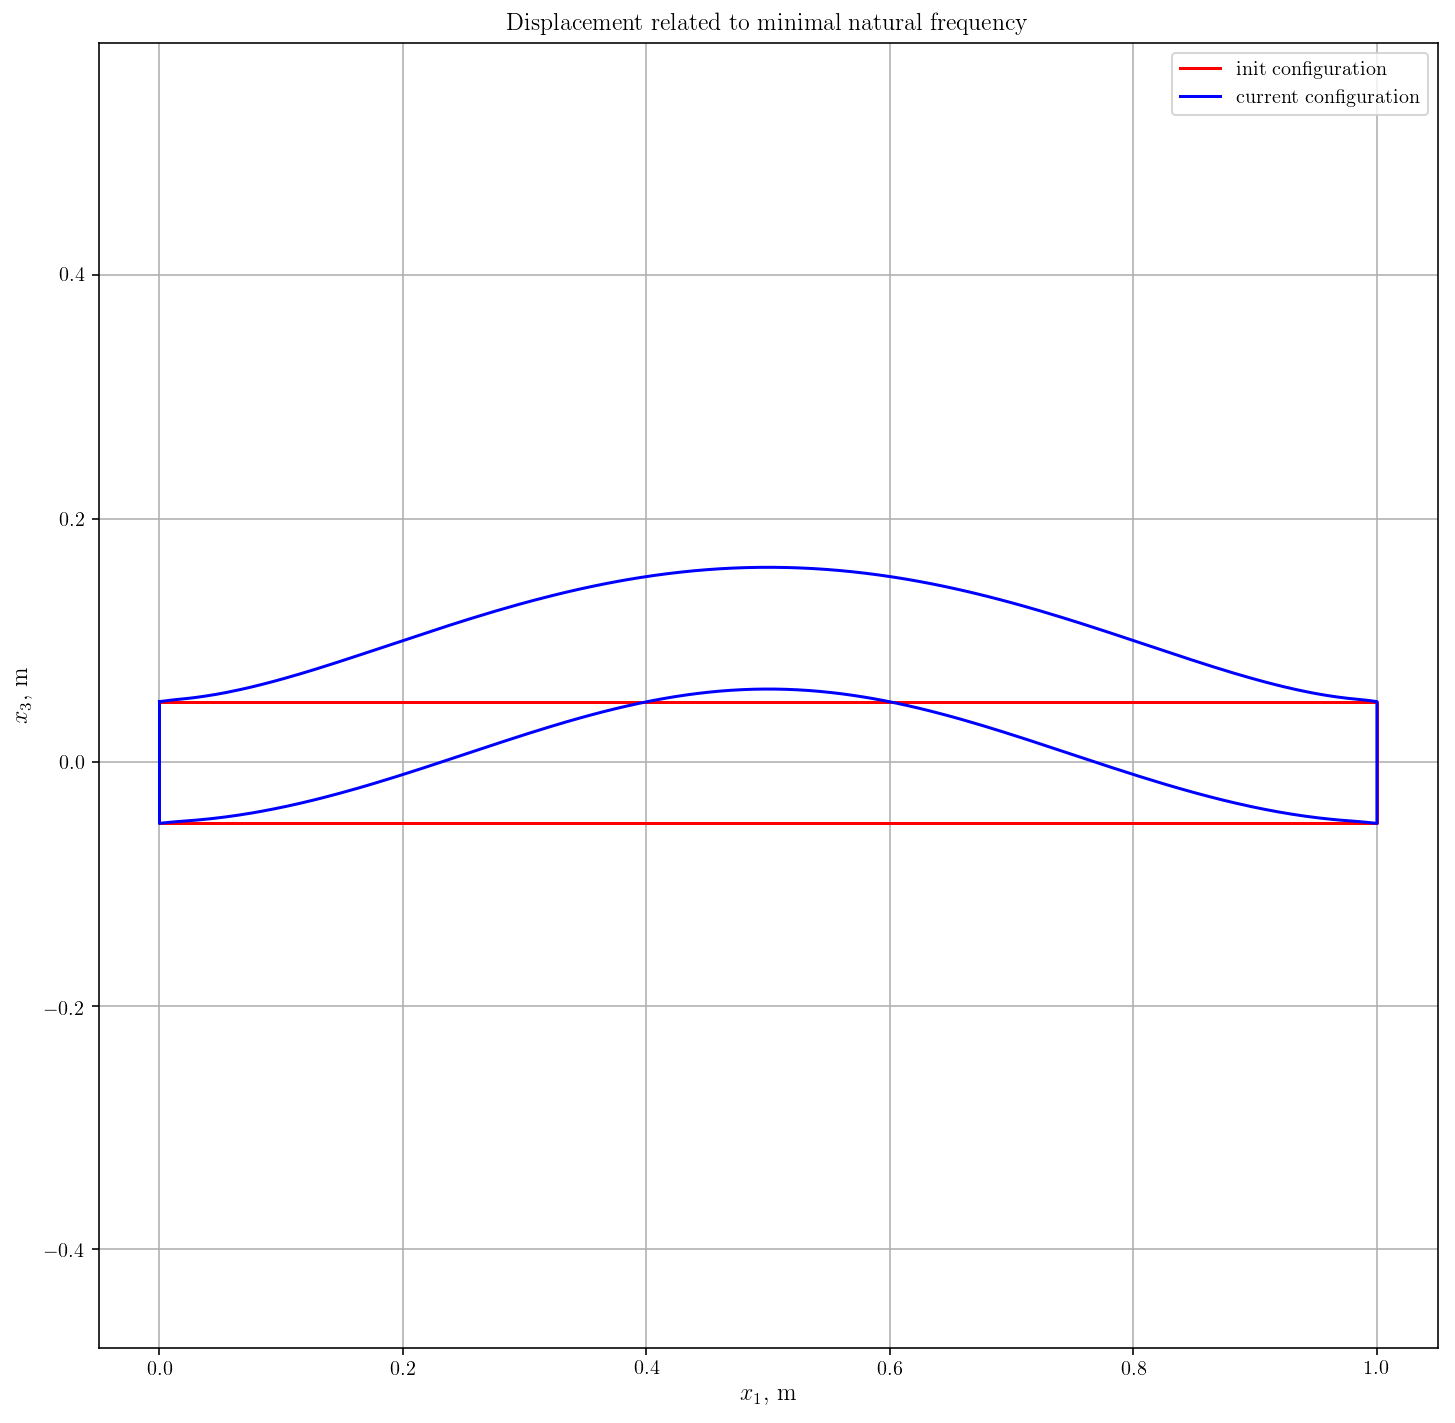

457.15104154
1176.04015959
2133.19330962
2356.21922439
3249.5900054
4474.86806849
4702.95142796
5775.41422456
7029.60446297
7129.39189295
8522.02986312
9323.24612856
9942.895666
11384.1414763
11567.1643488
12839.3126367
13739.3484622
14300.4812534
15531.7551778
15733.1045431


In [20]:
import fem.geometry as g
import fem.model as m
import fem.material as mat
import fem.mesh as me
import plot

import fem.shells1D.secondorder.shellsolver as s
import fem.shells1D.secondorder.result1D as r


def solve(geometry, thickness, material, N):
    layers = m.Layer.generate_layers(thickness, [material])
    model = m.Model(geometry, layers, m.Model.FIXED_BOTTOM_LEFT_RIGHT_POINTS)
    mesh = me.Mesh.generate1D(geometry.width, layers, N, model.boundary_conditions)
    
    lam, vec = s.solve(model, mesh, stiffness_matrix, mass_matrix)
    
    results = r.Result.convert_to_results(lam, vec, mesh, geometry, thickness)
    
    return results


stiffness_matrix_func = lambdify([A, K, mu, la, h], S_in, "numpy")
mass_matrix_func = lambdify([A, K, rho, h], M_in, "numpy")


def stiffness_matrix(material, geometry, x1, h):
    A,K = geometry.get_A_and_K(x1,0,0)
    return stiffness_matrix_func(A, K, material.mu(), material.lam(), h)

def mass_matrix(material, geometry, x1, h):
    A,K = geometry.get_A_and_K(x1,0,0)
    return mass_matrix_func(A, K, material.rho, h)


E3f = 1
material = mat.IsotropicMaterial(40000000000,0.3,2000)
material.C[2,2] *= E3f

width = 1
curvature = 0
thickness = 0.1

corrugation_amplitude = 0
corrugation_frequency = 20

geometry = g.General(width, curvature, corrugation_amplitude, corrugation_frequency)

N_width = 100

results = solve(geometry, thickness, material, N_width)

results_index = 0
    
plot.plot_init_and_deformed_geometry_in_cartesian(results[results_index], 0, width, -thickness / 2, thickness / 2, 0, geometry.to_cartesian_coordinates)

to_print = 20
if (len(results) < to_print):
    to_print = len(results)

for i in range(to_print):
    print(results[i].freqHz())


In [ ]:
values_N_width = [50, 100, 150, 200, 300, 400]

width = 2
curvature = 0.00000001
thickness = 0.05

corrugation_amplitude = 0
corrugation_frequency = 0

geometry = g.General(width, curvature, corrugation_amplitude, corrugation_frequency)

results_all_n = {}

for n in values_N_width:
    lam, vec, mesh, geometry = solve(geometry, thickness, False, n)

    results = s.convert_to_results(lam, vec, mesh, geometry, thickness)
    
    results_all_n[n]=results

In [ ]:
from jupyter_utils import ListTable

table = ListTable()
header = ['$\omega_i \\ N$']

for n in values_N_width:
    header.append(n)

table.append(header)

to_print = 5
for i in range(to_print):
    row = [i]
    for n in values_N_width:
        results = results_all_n[n]
        wi = results[i].rad_per_sec_to_Hz(results[i].freq)
        row.append(wi)
    
    table.append(row)


table